## Hierarchical Clustering

10/20/2020

---

In [1]:
# Import libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import dataset

os.chdir('//Users/mareksturek/Documents/GitHub/machine-learning/data')
dataset = pd.read_csv('rawmallcustomers.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
# Create X

X = dataset.iloc[:, [3, 4]].values

In [6]:
# Using the dendrogram to find the optimal number of clusters

"""
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=10) 
plt.xticks( rotation='vertical')
"""

"\nfrom matplotlib.pyplot import figure\nfigure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')\nplt.rc('xtick', labelsize=30) \nplt.rc('ytick', labelsize=10) \nplt.xticks( rotation='vertical')\n"

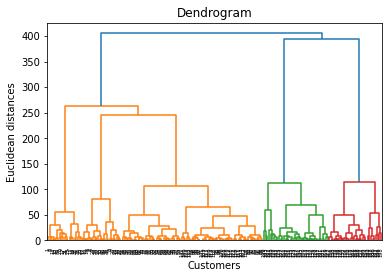

In [7]:
# Visualising the clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

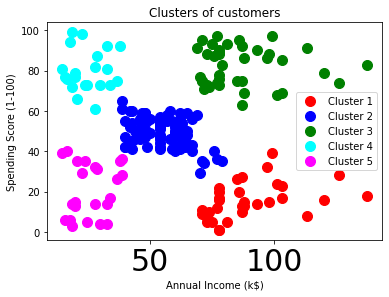

In [9]:
# Fitting Hierarchical Clustering to the dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()